<a href="https://colab.research.google.com/github/ShipengLYU/Gazefollwing/blob/gazefollowing-v0/GazeFollowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#挂载Google drive 空间

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


删除无用数据

In [4]:
!rm -rf /content/sample_data
!rm -rf /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata

#训练网络

导入数据集并解压

In [5]:

!mkdir /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata
%cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata 
%pwd
!jar xvf /content/drive/MyDrive/gazetracking-method2/GazeFollowing/data_new.zip
# !rm -rf /content/data_new


/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata
java.io.FileNotFoundException: /content/drive/MyDrive/gazetracking-method2/GazeFollowing/data_new.zip (No such file or directory)
	at java.base/java.io.FileInputStream.open0(Native Method)
	at java.base/java.io.FileInputStream.open(FileInputStream.java:219)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:157)
	at java.base/java.io.FileInputStream.<init>(FileInputStream.java:112)
	at jdk.jartool/sun.tools.jar.Main.run(Main.java:407)
	at jdk.jartool/sun.tools.jar.Main.main(Main.java:1680)


In [3]:
import sys
%cd /content/
%pwd
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing')
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata/data_new/test2')
sys.path.append('/content/drive/MyDrive/gazetracking-method2/GazeFollowing/code')
!cd /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code && python test_gazefollow.py

/content
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio.py", line 39, in _open_file
    return open(file_like, mode), True
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/gazetracking-method2/GazeFollowing/Gazedata/data_new/test_annotations.mat'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "test_gazefollow.py", line 255, in <module>
    main()
  File "test_gazefollow.py", line 237, in main
    training='test')
  File "test_gazefollow.py", line 51, in __init__
    anns = loadmat(self.mat_file)
  File "/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio.py", line 224, in loadmat
    with _open_file_context(file_name, appendmat) as f:
  File "/usr/lib/python3.7/contextlib.py", line 112, in __enter__
    return next(self.gen)
  File "/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio.py", line 17, in _open_file_context
    

#Upload our image

## detect the eyes position

In [4]:
!pip install mediapipe
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.5 MB/s 


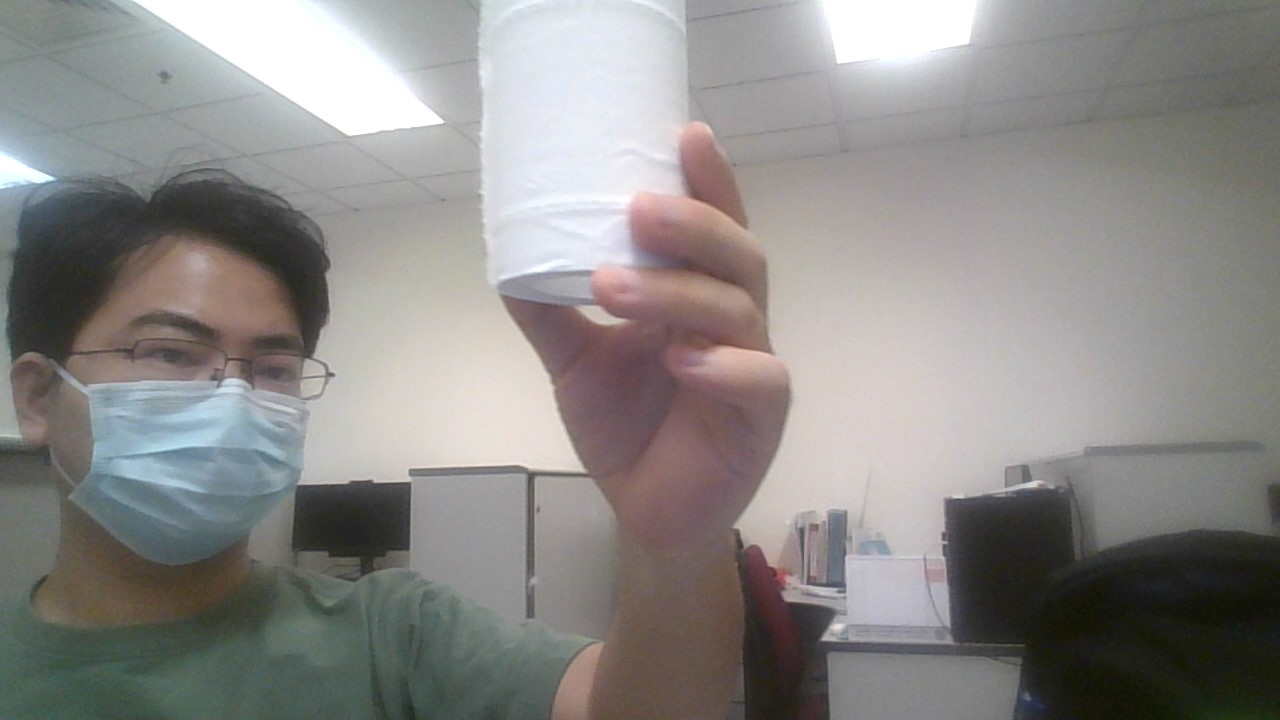

In [5]:
DESIRED_HEIGHT = 720
DESIRED_WIDTH = 1280
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Preview the images.
# short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
# for name, image in short_range_images.items():
#   print(name)   
#   resize_and_show(image)

# full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
# for name, image in full_range_images.items():
#   print(name)   
#   resize_and_show(image)
path= '/content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/1.jpg'
image=cv2.imread(path)
resize_and_show(image)

In [6]:
import mediapipe as mp
mp_face_detection = mp.solutions.face_detection

# help(mp_face_detection.FaceDetection)

In [8]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

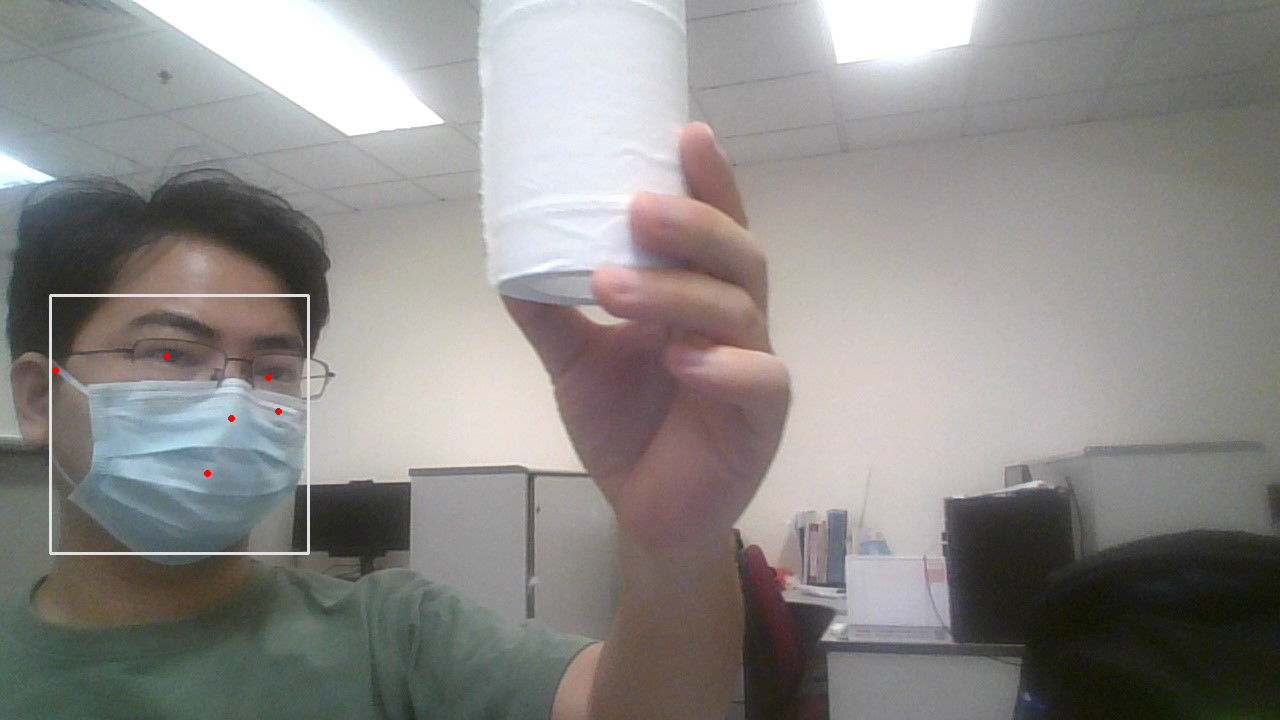

In [9]:
# Run MediaPipe Face Detection with short range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  # for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # print(results.detections)
    # Draw face detections of each face.
    # print(f'Face detections of {name}:')
    # if not results.detections:
    #   break
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)



In [26]:
e_x=(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE).x+mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.LEFT_EYE).x)/2
e_y=(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.RIGHT_EYE).y+mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.LEFT_EYE).y)/2
print(e_x)
print(e_y)

0.17006099224090576
0.5096129775047302


In [35]:
# !python /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code/inference.py /content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/1.jpg 0.17 0.51
!python /content/drive/MyDrive/gazetracking-method2/GazeFollowing/code/inference.py /content/drive/MyDrive/gazetracking-method2/GazeFollowing/images/00000003.jpg 0.52 0.14

0.6071428571428571 0.4642857142857143
